<a href="https://colab.research.google.com/github/SuhasBRao/Digit-Classifier-app/blob/main/Digit_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

In [3]:
print(train_images.shape)

(60000, 28, 28)


In [4]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255.
    test_images = test_images / 255.
    return (train_images, test_images)

In [5]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [6]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

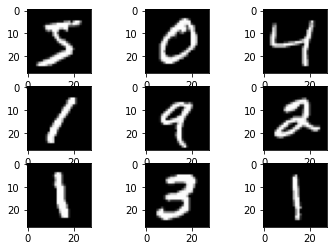

In [7]:
# plt.imshow(test_images[6],cmap='gray')
# print(test_labels[6])
# display all the images with differnt labels

from matplotlib import pyplot
for i in range(9):  
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_images[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [12]:
# train_images = train_images[..., np.newaxis]
# test_images = test_images[..., np.newaxis]

In [8]:
print(scaled_train_images.shape)

(60000, 28, 28, 1)


In [33]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Conv2D(32, kernel_size = (3,3), \
                activation = 'relu', padding = 'same', input_shape = input_shape))
    model.add(tf.keras.layers.MaxPool2D((2,2)))

    model.add(tf.keras.layers.Conv2D(64, kernel_size = (3,3), \
                activation = 'relu', padding = 'same'))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    # model.add(tf.keras.layers.Dense (64, activation = 'relu')) 
    model.add(tf.keras.layers.Dense(10, activation = 'softmax'))
    
    return model

In [42]:
model = get_model(scaled_train_images[0].shape)

In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [44]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                 metrics = ['accuracy'])

In [45]:
# Run your function to compile the model

compile_model(model)

In [46]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs = 5,  validation_split=0.2, shuffle=True, verbose = 1)

    return history

In [47]:

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.1481 - accuracy: 0.9548 - val_loss: 0.0584 - val_accuracy: 0.9819
Epoch 2/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0510 - accuracy: 0.9846 - val_loss: 0.0503 - val_accuracy: 0.9835
Epoch 3/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0358 - accuracy: 0.9882 - val_loss: 0.0390 - val_accuracy: 0.9888
Epoch 4/5
1500/1500 [==============================] - 60s 40ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0430 - val_accuracy: 0.9873
Epoch 5/5
1500/1500 [==============================] - 61s 41ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0385 - val_accuracy: 0.9908


In [48]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

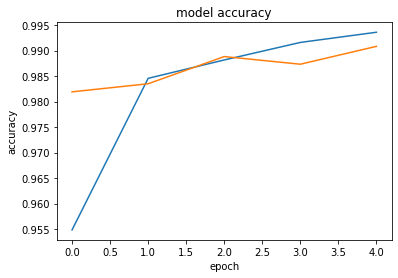

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [50]:
def evaluate_model(model, test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    return (test_loss, test_accuracy)

In [51]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 4s 13ms/step - loss: 7.5321 - accuracy: 0.9877
Test loss: 7.532137393951416
Test accuracy: 0.9876999855041504


In [52]:
model.save('ACC_98.77.h5')